In [53]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
from statsmodels.stats.contingency_tables import mcnemar

## Hypothesis Testing

### Wald test

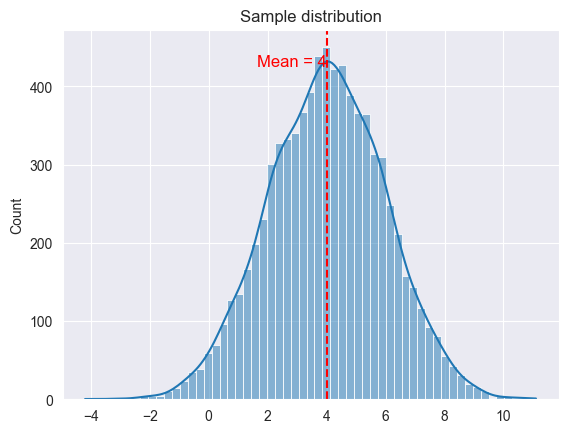

In [164]:
sample = np.random.normal(loc=4, scale=2, size=8000)
sns.histplot(sample, kde=True)
plt.title("Sample distribution")
plt.axvline(x=4, color='r', linestyle = 'dashed')
plt.text(4, plt.ylim()[1]*0.9, 'Mean = 4', fontsize=12, color='red', ha='right')
plt.show()

our true distribution: $\mathcal{N}(4. 2)$

In [37]:
se = np.std(sample) / np.sqrt(len(sample))
norm_distribution = sp.stats.norm(loc=4, scale=2)
theta_hat = np.mean(sample)
theta_true = 4
alpha = 0.05


W = np.abs((theta_hat - theta_true) / se)

if W > sp.stats.norm.ppf(1 - alpha/2):
    print(f"W equals {W} and z_(0.025) equals to {sp.stats.norm.ppf(1 - alpha/2)} so we reject H0")

else:
    print(f"W equals {W} and z_(0.025) equals to {sp.stats.norm.ppf(1 - alpha/2)} so we do not reject H0.")
    

W equals 1.0850201275138207 and z_(0.025) equals to 1.959963984540054 so we do not reject H0.


In [35]:
z_0_025 = sp.stats.norm.ppf(1-0.025)
print(z_0_025)

1.959963984540054


#### Binary Classification Model Selection


In [46]:
X = np.random.binomial(n=1, p=0.78, size=1000) # classifier 1
Y = np.random.binomial(n=1, p=0.84, size=1500) # classifier 2 

m = len(X)
n = len(Y)

p_1_hat = np.mean(X)
p_2_hat = np.mean(Y)
delta_hat = p_1_hat - p_2_hat

se_hat = np.sqrt(((p_1_hat * (1 - p_1_hat)) / m)+ ((p_2_hat * (1 - p_2_hat)) / n))

W = np.abs(delta_hat / se_hat)

if W > sp.stats.norm.ppf(1 - alpha/2):
    print(f"W equals {W} and z_(0.025) equals to {sp.stats.norm.ppf(1 - alpha/2)} so we reject H0")

else:
    print(f"W equals {W} and z_(0.025) equals to {sp.stats.norm.ppf(1 - alpha/2)} so we do not reject H0.")

W equals 4.176806005298536 and z_(0.025) equals to 1.959963984540054 so we reject H0


## McNemar test


In [86]:
conf_matrixx = np.array([
    [333, 110],
    [40, 230]
])


print(mcnemar(conf_matrixx))


pvalue      9.562829077717881e-09
statistic   40.0


### Pearson $\chi^2$  Test for Multinomial Data

In [113]:
X = np.array([315,101,108,32])
n = np.sum(X)
p_hat = X / n

T = np.sum((X - p_hat)**2 / (n * p_hat))
T

554.001798561151

In [115]:
(X - n * p_hat)**2 / (n * p_hat)

array([0.00000000e+00, 0.00000000e+00, 1.86989252e-30, 0.00000000e+00])

## ANOVA – Analysis of Variances

In [121]:
group_1 = np.random.normal(loc=3, scale=4, size=5000)
group_2 = np.random.normal(loc=2.9998, scale=3, size=5000)
group_3 = np.random.normal(loc=3.00012, scale=6, size=5000)

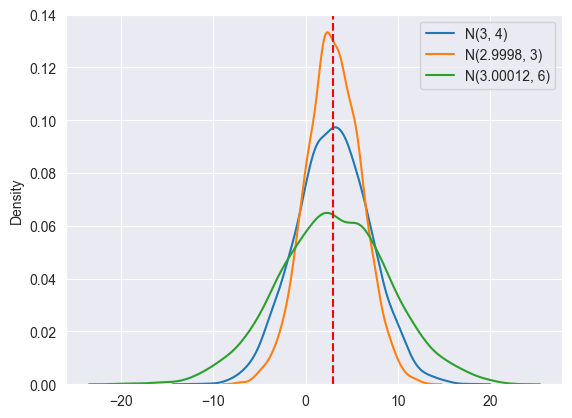

In [163]:
sns.kdeplot(group_1, label="N(3, 4)")
sns.kdeplot(group_2, label="N(2.9998, 3)")
sns.kdeplot(group_3, label="N(3.00012, 6)")
plt.legend()
plt.axvline(x=3, color='r', linestyle = 'dashed')
plt.show()

In [157]:
def anova():
    group_1 = np.random.normal(loc=3, scale=4, size=5000)
    group_2 = np.random.normal(loc=2.9998, scale=3, size=5000)
    group_3 = np.random.normal(loc=3.00012, scale=6, size=5000)
    groups = [group_1, group_2, group_3]
    
    
    y_gag = np.mean(np.concatenate((group_1, group_2, group_3), axis=0))
    k = 3
    N = np.sum([len(group) for group in groups])
    
    
    SSB = np.sum([len(group) * (np.mean(group) - y_gag)**2 for group in groups] )
    SSW = np.sum([np.sum((group - np.mean(group))**2) for group in groups])
    
    
    F = ( (SSB / (k-1)) / (SSW / (N-k)))
    p_value = sp.stats.f.sf(F, k-1, N-k)
    
    print("F-statistic:", F)
    print("P-value:", p_value)
    
anova()

F-statistic: 0.6886393741555874
P-value: 0.5022748722665789


In [129]:
np.concatenate((np.array([1, 2, 3]), np.array([4, 3, 4])), axis=0)

array([1, 2, 3, 4, 3, 4])

## Mann-Whitney U Test

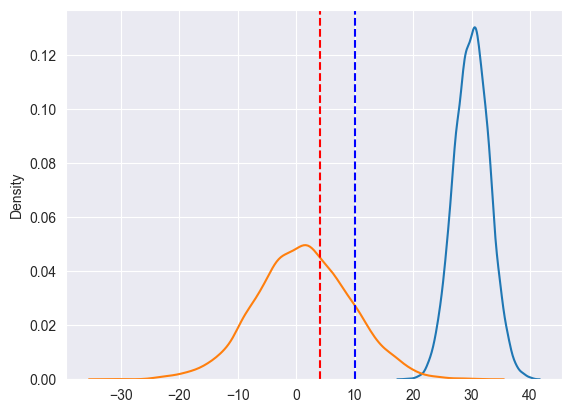

In [180]:
group_1 = np.random.normal(loc=30, scale=3, size=8000)
group_2 = np.random.normal(loc=1, scale=8, size=8000)

sns.kdeplot(group_1)
sns.kdeplot(group_2)
plt.axvline(x=10, linestyle = 'dashed', color='b')
plt.axvline(x=4, linestyle = 'dashed', color='r')

plt.show()

In [184]:
def mann_u(group_1, group_2):
    print(sp.stats.mannwhitneyu(group_1, group_2, method='exact'))

mann_u(group_1, group_2)

KeyboardInterrupt: 